# Mission to Mars assignment

Step 1 - Scraping

NASA Mars News Site:
collect the latest News Title and Paragraph Text

In [1]:
# Dependencies
from bs4 import BeautifulSoup
import requests
from splinter import Browser

In [2]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
mars_news_url = 'https://mars.nasa.gov/news/'
browser.visit(mars_news_url)

In [4]:
mars_news_html = browser.html
mars_news_soup = BeautifulSoup(mars_news_html, 'html.parser')

<!DOCTYPE html>
<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;callback=_ate.cbs.rcb_ikzm0" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F%3Fpage%3D0%26per_page%3D40%26order%3Dpublish_date%2Bdesc%252Ccreated_at%2Bdesc%26search%3D%26category%3D19%252C165%252C184%252C204%26blank_scope%3DLatest&amp;jsonp=_ate.cbs.rcb_kteh0" type="text/javascript">
  </script>
  <script src="//graph.face
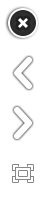
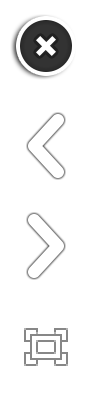
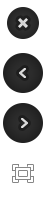
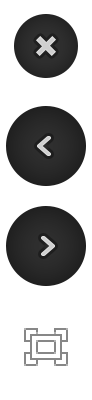
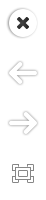
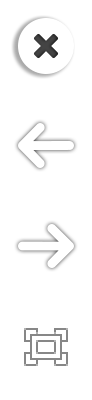
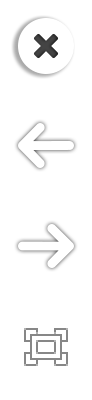
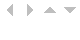

In [5]:
print(mars_news_soup.prettify())

In [6]:
# results that we're looking for seem to be beneath the <li class="slide">
mars_news_results = mars_news_soup.find('li', class_="slide")
mars_news_results

<li class="slide"><div class="image_and_description_container"><a href="/news/8373/painting-cars-for-mars/" target="_self"><div class="rollover_description"><div class="rollover_description_inner">What does NASA do to get a rover ready for Mars? JPL's paint shop does a thousand different paint jobs a year. And while every piece of spacecraft that comes through the shop is important, one headed for the Red Planet adds a little extra oomph.</div><div class="overlay_arrow"><img alt="More" src="/assets/overlay-arrow.png"/></div></div><div class="list_image"><img alt="" src="/system/news_items/list_view_images/8373_mars20181004-320.jpg"/></div><div class="bottom_gradient"><div><h3>Painting Cars for Mars</h3></div></div></a><div class="list_text"><div class="list_date">October  9, 2018</div><div class="content_title"><a href="/news/8373/painting-cars-for-mars/" target="_self">Painting Cars for Mars</a></div><div class="article_teaser_body">What does NASA do to get a rover ready for Mars? JPL

In [7]:
#Identify and return title of latest news
# the title is part of the <h3> tag so get text from there
mars_news_title = mars_news_results.find('h3').text
mars_news_title

'Painting Cars for Mars'

In [8]:
#Identify and return paragraph text of latest news
# the paragraph text is part of the <div class="article_teaser_body"> so get text from there
mars_news_p = mars_news_results.find('div', class_="article_teaser_body").text
mars_news_p

"What does NASA do to get a rover ready for Mars? JPL's paint shop does a thousand different paint jobs a year. And while every piece of spacecraft that comes through the shop is important, one headed for the Red Planet adds a little extra oomph."

JPL Mars Space Images Site - find image URL for the current Featured Mars Image

In [9]:
jpl_mars_url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(jpl_mars_url)

In [10]:
jpl_mars_html = browser.html
jpl_mars_soup = BeautifulSoup(jpl_mars_html, 'html.parser')

In [11]:
print(jpl_mars_soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]> <html class="no-js ie ie9" lang="en"> <![endif]-->
<!--[if IE 8]> <html class="no-js ie ie8" lang="en"> <![endif]-->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface no-generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style="" xmlns="http://www.w3.org/1999/xhtml">
 <!-- START HEADER: "DEFAULT" -->
 <head>
  <script async="" src="https://script.crazyegg.com/pages/scripts/0025/5267.js?427538" type="text/javascript">
  </script>
  <script src="//m.addthis.com/live/red_lojson/300lo.json?si=5bbd657a59c6e672&amp;bkl=0&amp;bl=1&amp;pdt=1236&amp;sid=5bbd657a59c6e672&amp;pub=&amp;rev=v8.3.7-wp&am

In [12]:
# results that we're looking for seem to be inside the <a class="button fancybox"
jpl_mars_results = jpl_mars_soup.find('a', class_="button fancybox")
jpl_mars_results

<a class="button fancybox" data-description="A new day dawns on Saturn as the part of the planet is seen emerging once more into the Sun's light by NASA's Cassini orbiter. With an estimated rotation period of 10 hours and 40 minutes, Saturn's days and nights are much shorter than those on Earth." data-fancybox-group="images" data-fancybox-href="/spaceimages/images/mediumsize/PIA18289_ip.jpg" data-link="/spaceimages/details.php?id=PIA18289" data-title="Sunrise on Saturn" id="full_image">
					FULL IMAGE
				  </a>

In [13]:
#Identify and return full image url of featured image

#Going to do manipulation to eventually get the url after data-fancybox-href= into a string variable

#convert jpl_mars_results above into a string
jpl_m_str = str(jpl_mars_results)
#use split function and split on 'data-fancybox-href='
jpl_m_str_split = jpl_m_str.split("data-fancybox-href=")
#now we have a list so take the second element in that list
new_jpl_str = jpl_m_str_split[1]
#use split function again and split on " data-link"
new_jpl_str_split = new_jpl_str.split(" data-link")
#now we have a list so take the first element in that list to get the url we want but with a " as first element and last element
new_img_str = new_jpl_str_split[0]
# finally get the url we want but take out the " in front and end of the string
final_img_str = new_img_str[1:-1]
# now concatenate the base url value of https://www.jpl.nasa.gov to final_img_str to get featured_image_url
featured_image_url = 'https://www.jpl.nasa.gov' + final_img_str
featured_image_url

'https://www.jpl.nasa.gov/spaceimages/images/mediumsize/PIA18289_ip.jpg'

Mars Weather twitter account - scrape the latest Mars weather tweet from the page. Save the tweet text for the weather report as a variable

In [14]:
mars_weather_url = 'https://twitter.com/marswxreport?lang=en'
browser.visit(mars_weather_url)

In [15]:
mars_weather_html = browser.html
mars_weather_soup = BeautifulSoup(mars_weather_html, 'html.parser')

In [16]:
print(mars_weather_soup.prettify())

<!DOCTYPE html>
<html data-scribe-reduced-action-queue="true" lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")&gt;-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"00e7a4af00b06350.bed2bc58b2c0e098\u003c:005403be00a936cd","server_request_start_time":1539138956794,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_b\/1.0.1\/20180927.2257.2a74df3","ttft_browser":"chrome"};!function(){fu

In [17]:
# results that we're looking for seem to be beneath the <li class="slide">
mars_weather_results = mars_weather_soup.find_all('p', class_="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text")
mars_weather_results

[<p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">And finally - a stack of all the images - you can see so much detail here <a class="twitter-timeline-link" data-expanded-url="https://dougellison.smugmug.com/Machines/Space-X-SAOCOM-1A/i-zbJzq8L" dir="ltr" href="https://t.co/r6pHbPsqq5" rel="nofollow noopener" target="_blank" title="https://dougellison.smugmug.com/Machines/Space-X-SAOCOM-1A/i-zbJzq8L"><span class="tco-ellipsis"></span><span class="invisible">https://</span><span class="js-display-url">dougellison.smugmug.com/Machines/Space</span><span class="invisible">-X-SAOCOM-1A/i-zbJzq8L</span><span class="tco-ellipsis"><span class="invisible"> </span>…</span></a><a class="twitter-timeline-link u-hidden" data-pre-embedded="true" dir="ltr" href="https://t.co/9nLwAH3oZQ">pic.twitter.com/9nLwAH3oZQ</a></p>,
 <p class="TweetTextSize TweetTextSize--normal js-tweet-text tweet-text" data-aria-label-part="0" lang="en">We detected ato

In [18]:
# The format of the tweet string we're looking for is:
#'Sol 2171 (2018-09-14)', high -12C/10F, low -65C/-84F, pressure at 8.79 hPa, daylight 05:43-17:59'

# I only want that format and not retweets or other text formats

# so I'm going to create an empty list called sol_list
# then I'm going to loop through each result in mars_weather_results
# if the text value returned starts with 'Sol 2' then I'm going to append that whole text string into sol_list

sol_list = []
for result in mars_weather_results:
    parsed_text_string = result.text
    if parsed_text_string[0:5] == "Sol 2":
        sol_list.append(parsed_text_string)
        
sol_list

['Sol 2171 (2018-09-14), high -12C/10F, low -65C/-84F, pressure at 8.79 hPa, daylight 05:43-17:59',
 'Sol 2170 (2018-09-13), high -12C/10F, low -68C/-90F, pressure at 8.86 hPa, daylight 05:42-17:59',
 'Sol 2169 (2018-09-12), high -10C/14F, low -70C/-93F, pressure at 8.82 hPa, daylight 05:41-17:58',
 'Sol 2168 (2018-09-11), high -13C/8F, low -69C/-92F, pressure at 8.99 hPa, daylight 05:41-17:57',
 'Sol 2167 (2018-09-10), high -12C/10F, low -73C/-99F, pressure at 8.85 hPa, daylight 05:40-17:57',
 'Sol 2166 (2018-09-09), high -10C/14F, low -72C/-97F, pressure at 8.87 hPa, daylight 05:40-17:56',
 'Sol 2165 (2018-09-08), high -10C/14F, low -70C/-93F, pressure at 8.87 hPa, daylight 05:39-17:55',
 'Sol 2164 (2018-09-07), high -8C/17F, low -68C/-90F, pressure at 8.86 hPa, daylight 05:39-17:55',
 'Sol 2163 (2018-09-06), high -5C/23F, low -70C/-93F, pressure at 8.86 hPa, daylight 05:38-17:54']

In [19]:
# Now just grab the first element in the list, meaning the latest weather tweet
# and store that in variable called mars_weather

mars_weather = sol_list[0]
mars_weather

'Sol 2171 (2018-09-14), high -12C/10F, low -65C/-84F, pressure at 8.79 hPa, daylight 05:43-17:59'

Mars Facts - Visit the Mars Facts webpage and use Pandas to scrape the table containing facts about the planet including Diameter, Mass, etc.

In [20]:
import pandas as pd

In [21]:
mars_facts_url = 'https://space-facts.com/mars/'

In [22]:
mars_facts_tables = pd.read_html(mars_facts_url)
mars_facts_tables

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.42 x 10^23 kg (10.7% Earth)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.52 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                  -153 to 20 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers]

In [23]:
# Create a dataframe with column names Description and Value

mars_facts_df = mars_facts_tables[0]
mars_facts_df.columns = ['Description', 'Value']
mars_facts_df

,Description,Value
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.42 x 10^23 kg (10.7% Earth)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.52 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-153 to 20 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [24]:
# Generate HTML table from dataframe
# remove numbers as row labels by using index=False
# align columns on the left by using justify='left'
mars_facts_html_table = mars_facts_df.to_html(index=False, justify= 'left')
mars_facts_html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: left;">\n      <th>Description</th>\n      <th>Value</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <td>Mass:</td>\n      <td>6.42 x 10^23 kg (10.7% Earth)</td>\n    </tr>\n    <tr>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.52 AU)</td>\n    </tr>\n    <tr>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <td>Surface Temperature:</td>\n      <td>-153 to 20 °C</td>\n    </tr>\n    <tr>\n      <td>First Record:</td>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <td>Recorded By:</td>\n      <td>Egyptian astronomers</td>\n    </tr>\n  </tbody>\n</table>'

Mars Hemispheres -  Visit the USGS Astrogeology site to obtain high resolution images for each of Mars' hemispheres.
Create a list of dictionaries where the dictionaries have hemisphere name and url string for full resolution hemisphere image

In [25]:
mars_hemispheres_url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(mars_hemispheres_url)

In [26]:
mars_hemispheres_html = browser.html
mars_hemispheres_soup = BeautifulSoup(mars_hemispheres_html, 'html.parser')

In [27]:
print(mars_hemispheres_soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.3/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <script async="" src="https://ssl.google-analytics.com/ga.js" type="text/javascript">
  </script>
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js" type="text/javascript">
  </script>
  <title>
   Astropedia Search Results | USGS Astrogeology Science Center
  </title>
  <meta content="USGS Astrogeology Science Center Astropedia search results." name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRo

In [28]:
# results that we're looking for seem to be inside the <div class="description"
mars_hemispheres_results = mars_hemispheres_soup.find_all('div', class_="description")
mars_hemispheres_results

[<div class="description"><a class="itemLink product-item" href="/search/map/Mars/Viking/cerberus_enhanced"><h3>Cerberus Hemisphere Enhanced</h3></a><span class="subtitle" style="float:left">image/tiff 21 MB</span><span class="pubDate" style="float:right"></span><br/><p>Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. This mosaic is composed of 104 Viking Orbiter images acquired…</p></div>,
 <div class="description"><a class="itemLink product-item" href="/search/map/Mars/Viking/schiaparelli_enhanced"><h3>Schiaparelli Hemisphere Enhanced</h3></a><span class="subtitle" style="float:left">image/tiff 35 MB</span><span class="pubDate" style="float:right"></span><br/><p>Mosaic of the Schiaparelli hemisphere of Mars projected into point perspective, a view similar to that which one would see from a spacecraft. The images were acquired in 1980 during early northern…</p></div>,
 <div class="description"><a 

In [29]:
#create a list of all the hemisphere names

#start with an empty list called hemisphere_title_list
hemisphere_title_list = []

#use a for loop to go through mars_hemispheres_results
#the h3 tag seems to have the hemisphere title so do a find on that and use text
#then append each of those found to hemisphere_title_list

for result in mars_hemispheres_results:
    hemisphere_title = result.find('h3').text
    hemisphere_title_list.append(hemisphere_title)
    
hemisphere_title_list

['Cerberus Hemisphere Enhanced',
 'Schiaparelli Hemisphere Enhanced',
 'Syrtis Major Hemisphere Enhanced',
 'Valles Marineris Hemisphere Enhanced']

In [30]:
hemisphere_img_url_list = []

for item in hemisphere_title_list:
    # check if text of the hemisphere name from our list is shown on the screen and wait up to 2 seconds
    browser.is_text_present(item, 2)
    # click on link to go that specific hemisphere page
    browser.click_link_by_partial_text(item)
    #use BeautifulSoup to get html response
    enhanced_html = browser.html
    enhanced_soup = BeautifulSoup(enhanced_html, 'html.parser')
    #looks like the img url we're searching for is under <div class="downlaods">
    enhanced_results = enhanced_soup.find('div', class_= 'downloads')
    #then look under 'a' tag
    enhanced_link = enhanced_results.find('a')
    #then get full img url from href
    enhanced_href = enhanced_link['href']
    hemisphere_img_url_list.append(enhanced_href)
    # check if text 'Back' is shown on the screen (for back button) and wait up to 2 seconds
    browser.is_text_present('Back', 2)
    # click on the Back button to go back to previous page
    browser.click_link_by_partial_text('Back')

hemisphere_img_url_list

['http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg',
 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg',
 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg',
 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg']

In [31]:
#create four separate dictionaries, each with 'title' as first key and 'img_url' as second key
first_dict = {'title': hemisphere_title_list[0], 'img_url': hemisphere_img_url_list[0]}
second_dict = {'title': hemisphere_title_list[1], 'img_url': hemisphere_img_url_list[1]}
third_dict = {'title': hemisphere_title_list[2], 'img_url': hemisphere_img_url_list[2]}
fourth_dict = {'title': hemisphere_title_list[3], 'img_url': hemisphere_img_url_list[3]}
print(first_dict)
print(second_dict)
print(third_dict)
print(fourth_dict)

{'title': 'Cerberus Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'}
{'title': 'Schiaparelli Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'}
{'title': 'Syrtis Major Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'}
{'title': 'Valles Marineris Hemisphere Enhanced', 'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}


In [32]:
# create list of the four dictionaries by using append function
hemisphere_image_urls = []
hemisphere_image_urls.append(first_dict)
hemisphere_image_urls.append(second_dict)
hemisphere_image_urls.append(third_dict)
hemisphere_image_urls.append(fourth_dict)
hemisphere_image_urls

[{'title': 'Cerberus Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/cerberus_enhanced.tif/full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/schiaparelli_enhanced.tif/full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/syrtis_major_enhanced.tif/full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'img_url': 'http://astropedia.astrogeology.usgs.gov/download/Mars/Viking/valles_marineris_enhanced.tif/full.jpg'}]